In [2]:
!nvidia-smi
#nvidia-smi dmon

Fri Nov 27 16:25:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 455.38       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:08:00.0  On |                  N/A |
| 16%   37C    P8    12W / 215W |    750MiB /  8116MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install pydot
# !apt install graphviz
!pip install graphviz
!pip install pandas
!pip install sklearn
!pip3 install opencv-python
!pip install keras
!apt-get update
# !apt-get install -y libgl1-mesa-dev
!pip install pydot

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import cv2
from math import sin, cos, pi
from time import strftime
from datetime import datetime

In [2]:
train_data = pd.read_csv('data/training.csv') 
test_data = pd.read_csv('data/test.csv') 
Id_data = pd.read_csv('data/IdLookupTable.csv') 

# MODEL EXAMPLE

In [3]:
from tensorflow import keras
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D


In [4]:
bias=False
activation = LeakyReLU(alpha=0.1)
# activation = ReLU()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

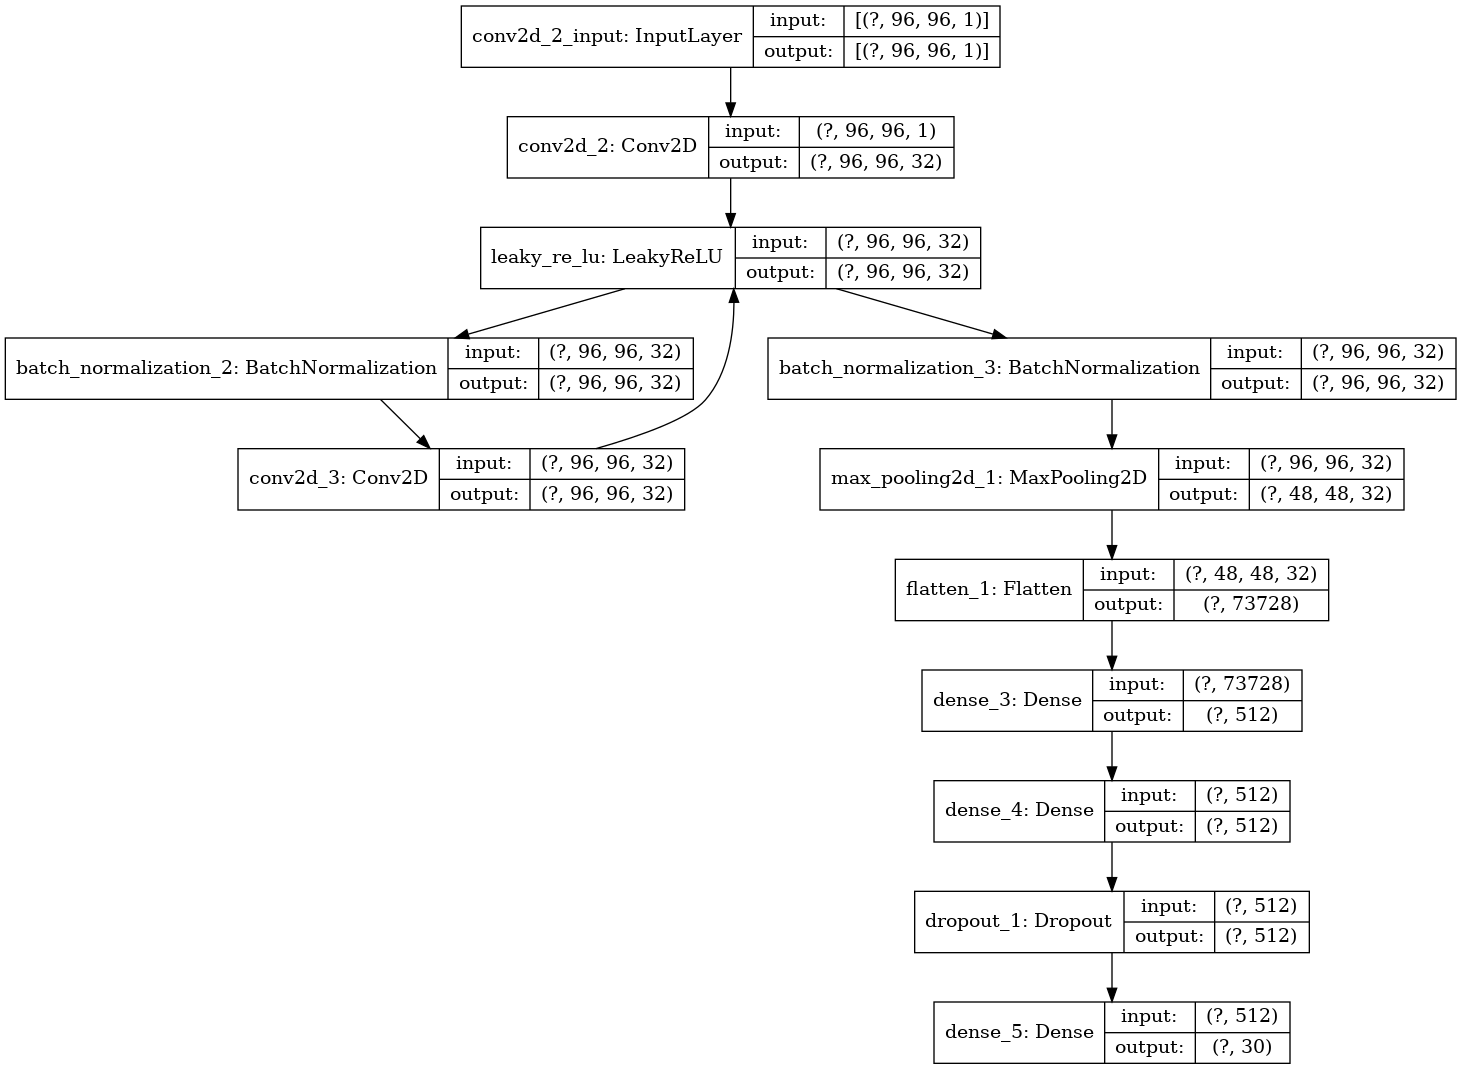

In [6]:
model = Sequential()

#Block 1
model.add(Convolution2D(32, (3,3), padding='same', use_bias=bias, input_shape=(96,96,1)))
model.add(activation)
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=bias))
model.add(activation)
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

#Block 2

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

#Block 3
# model.add(Convolution2D(96, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=bias))
# model.add(activation)
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
# model.add(Dense(32,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','accuracy'])

In [8]:
train_data = pd.read_csv('data/training.csv')

images = []
y_train = []

print(len(train_data))
train_data = train_data.fillna(method = 'ffill')
for idx, sample in train_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_train = np.array(images)

7049


In [9]:
training = train_data.drop('Image',axis = 1)

y_train = []
for idx, sample in training.iterrows():
    y = training.iloc[idx,:]
    y_train.append(y)    
y_train = np.array(y_train,dtype = 'float')

In [10]:
start_time = datetime.now()
history = model.fit(X_train,y_train,epochs = 300,batch_size = 450,validation_split = 0.2)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/300
13/13 [==============================] - 4s 280ms/step - loss: 516.7786 - mae: 16.2814 - accuracy: 0.2179 - val_loss: 1887.1477 - val_mae: 33.2738 - val_accuracy: 0.0000e+00
Epoch 2/300
13/13 [==============================] - 3s 236ms/step - loss: 89.4832 - mae: 7.3962 - accuracy: 0.2834 - val_loss: 312.2763 - val_mae: 13.3409 - val_accuracy: 0.0142
Epoch 3/300
13/13 [==============================] - 3s 238ms/step - loss: 54.2758 - mae: 5.7743 - accuracy: 0.3297 - val_loss: 196.6226 - val_mae: 11.1917 - val_accuracy: 0.1000
Epoch 4/300
13/13 [==============================] - 3s 236ms/step - loss: 46.7085 - mae: 5.3474 - accuracy: 0.3666 - val_loss: 217.2326 - val_mae: 12.1681 - val_accuracy: 0.3404
Epoch 5/300
13/13 [==============================] - 3s 237ms/step - loss: 38.4583 - mae: 4.8507 - accuracy: 0.4283 - val_loss: 220.5743 - val_mae: 12.5425 - val_accuracy: 0.4234
Epoch 6/300
13/13 [==============================] - 3s 237ms/step - loss: 36.8267 - mae: 4.7609 -

13/13 [==============================] - 3s 253ms/step - loss: 12.6085 - mae: 2.7270 - accuracy: 0.7148 - val_loss: 5.4517 - val_mae: 1.5501 - val_accuracy: 0.7546
Epoch 46/300
13/13 [==============================] - 3s 258ms/step - loss: 10.6788 - mae: 2.5098 - accuracy: 0.7136 - val_loss: 4.8797 - val_mae: 1.4702 - val_accuracy: 0.7461
Epoch 47/300
13/13 [==============================] - 3s 258ms/step - loss: 10.9534 - mae: 2.5413 - accuracy: 0.7257 - val_loss: 7.3349 - val_mae: 2.0504 - val_accuracy: 0.7560
Epoch 48/300
13/13 [==============================] - 3s 256ms/step - loss: 11.5277 - mae: 2.6111 - accuracy: 0.7120 - val_loss: 7.1218 - val_mae: 1.9869 - val_accuracy: 0.7440
Epoch 49/300
13/13 [==============================] - 3s 255ms/step - loss: 13.4323 - mae: 2.8388 - accuracy: 0.7251 - val_loss: 14.5961 - val_mae: 3.1497 - val_accuracy: 0.7404
Epoch 50/300
13/13 [==============================] - 3s 257ms/step - loss: 11.7525 - mae: 2.6253 - accuracy: 0.7234 - val_loss

13/13 [==============================] - 3s 256ms/step - loss: 10.3732 - mae: 2.4797 - accuracy: 0.7964 - val_loss: 4.7046 - val_mae: 1.4054 - val_accuracy: 0.7688
Epoch 92/300
13/13 [==============================] - 3s 257ms/step - loss: 8.1625 - mae: 2.1876 - accuracy: 0.7925 - val_loss: 7.2552 - val_mae: 1.9064 - val_accuracy: 0.7482
Epoch 93/300
13/13 [==============================] - 3s 257ms/step - loss: 8.0148 - mae: 2.1653 - accuracy: 0.7980 - val_loss: 5.0819 - val_mae: 1.5519 - val_accuracy: 0.7404
Epoch 94/300
13/13 [==============================] - 3s 255ms/step - loss: 8.2120 - mae: 2.1958 - accuracy: 0.8039 - val_loss: 4.4411 - val_mae: 1.3293 - val_accuracy: 0.7553
Epoch 95/300
13/13 [==============================] - 3s 256ms/step - loss: 8.0740 - mae: 2.1708 - accuracy: 0.7955 - val_loss: 5.2688 - val_mae: 1.4974 - val_accuracy: 0.7518
Epoch 96/300
13/13 [==============================] - 3s 240ms/step - loss: 9.5266 - mae: 2.3693 - accuracy: 0.7998 - val_loss: 7.23

13/13 [==============================] - 3s 253ms/step - loss: 8.6084 - mae: 2.2477 - accuracy: 0.8321 - val_loss: 8.7445 - val_mae: 2.3148 - val_accuracy: 0.7638
Epoch 138/300
13/13 [==============================] - 3s 252ms/step - loss: 9.8005 - mae: 2.3882 - accuracy: 0.8239 - val_loss: 4.5298 - val_mae: 1.3354 - val_accuracy: 0.7504
Epoch 139/300
13/13 [==============================] - 3s 252ms/step - loss: 6.7160 - mae: 1.9689 - accuracy: 0.8250 - val_loss: 4.4106 - val_mae: 1.3311 - val_accuracy: 0.7589
Epoch 140/300
13/13 [==============================] - 3s 250ms/step - loss: 6.8148 - mae: 1.9866 - accuracy: 0.8236 - val_loss: 14.4201 - val_mae: 3.1676 - val_accuracy: 0.7411
Epoch 141/300
13/13 [==============================] - 3s 250ms/step - loss: 6.0711 - mae: 1.8760 - accuracy: 0.8305 - val_loss: 7.6139 - val_mae: 2.1092 - val_accuracy: 0.7397
Epoch 142/300
13/13 [==============================] - 3s 257ms/step - loss: 6.1172 - mae: 1.8867 - accuracy: 0.8399 - val_loss:

13/13 [==============================] - 3s 245ms/step - loss: 7.3910 - mae: 2.0719 - accuracy: 0.8418 - val_loss: 11.5448 - val_mae: 2.7694 - val_accuracy: 0.7397
Epoch 184/300
13/13 [==============================] - 3s 243ms/step - loss: 5.4768 - mae: 1.7799 - accuracy: 0.8427 - val_loss: 4.2129 - val_mae: 1.3215 - val_accuracy: 0.7589
Epoch 185/300
13/13 [==============================] - 3s 240ms/step - loss: 6.5328 - mae: 1.9533 - accuracy: 0.8484 - val_loss: 9.5745 - val_mae: 2.4871 - val_accuracy: 0.7454
Epoch 186/300
13/13 [==============================] - 3s 243ms/step - loss: 7.2735 - mae: 2.0501 - accuracy: 0.8510 - val_loss: 4.6543 - val_mae: 1.4407 - val_accuracy: 0.7589
Epoch 187/300
13/13 [==============================] - 3s 239ms/step - loss: 5.7286 - mae: 1.8162 - accuracy: 0.8539 - val_loss: 4.1076 - val_mae: 1.2646 - val_accuracy: 0.7582
Epoch 188/300
13/13 [==============================] - 3s 237ms/step - loss: 5.4982 - mae: 1.7700 - accuracy: 0.8503 - val_loss:

13/13 [==============================] - 3s 237ms/step - loss: 4.7613 - mae: 1.6465 - accuracy: 0.8658 - val_loss: 4.7563 - val_mae: 1.5205 - val_accuracy: 0.7652
Epoch 230/300
13/13 [==============================] - 3s 238ms/step - loss: 5.4467 - mae: 1.7663 - accuracy: 0.8647 - val_loss: 3.8780 - val_mae: 1.1524 - val_accuracy: 0.7574
Epoch 231/300
13/13 [==============================] - 3s 238ms/step - loss: 5.2390 - mae: 1.7303 - accuracy: 0.8617 - val_loss: 4.7192 - val_mae: 1.3910 - val_accuracy: 0.7489
Epoch 232/300
13/13 [==============================] - 3s 237ms/step - loss: 5.6182 - mae: 1.7932 - accuracy: 0.8674 - val_loss: 3.5808 - val_mae: 1.1284 - val_accuracy: 0.7645
Epoch 233/300
13/13 [==============================] - 3s 239ms/step - loss: 5.8762 - mae: 1.8306 - accuracy: 0.8718 - val_loss: 3.9209 - val_mae: 1.1749 - val_accuracy: 0.7574
Epoch 234/300
13/13 [==============================] - 3s 239ms/step - loss: 4.7110 - mae: 1.6417 - accuracy: 0.8535 - val_loss: 

13/13 [==============================] - 3s 238ms/step - loss: 4.9085 - mae: 1.6728 - accuracy: 0.8681 - val_loss: 3.7139 - val_mae: 1.1791 - val_accuracy: 0.7596
Epoch 276/300
13/13 [==============================] - 3s 238ms/step - loss: 4.5347 - mae: 1.6020 - accuracy: 0.8854 - val_loss: 4.4374 - val_mae: 1.2908 - val_accuracy: 0.7596
Epoch 277/300
13/13 [==============================] - 3s 238ms/step - loss: 5.0442 - mae: 1.6958 - accuracy: 0.8759 - val_loss: 3.6180 - val_mae: 1.1641 - val_accuracy: 0.7631
Epoch 278/300
13/13 [==============================] - 3s 238ms/step - loss: 4.9625 - mae: 1.6833 - accuracy: 0.8776 - val_loss: 4.7905 - val_mae: 1.4101 - val_accuracy: 0.7738
Epoch 279/300
13/13 [==============================] - 3s 238ms/step - loss: 4.6993 - mae: 1.6369 - accuracy: 0.8785 - val_loss: 3.6001 - val_mae: 1.1502 - val_accuracy: 0.7809
Epoch 280/300
13/13 [==============================] - 3s 238ms/step - loss: 5.4434 - mae: 1.7722 - accuracy: 0.8796 - val_loss: 

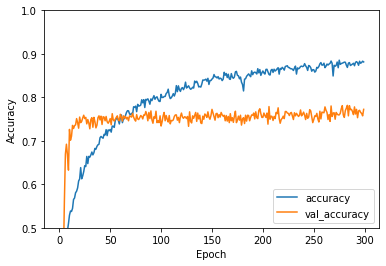

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_mae, acc = model.evaluate(X_train,y_train, verbose=2)

221/221 - 2s - loss: 3.6308 - mae: 1.4383 - accuracy: 0.8840


In [13]:

model_name = "model_{}_activation_{}_2FC.keras".format(strftime("`%Y-%m-%d_%H-%M-%S") , activation.name)
model.save(model_name)

In [14]:
model_name

'model_`2020-11-27_20-14-03_activation_leaky_re_lu_2FC.keras'

In [15]:
model = keras.models.load_model(model_name)

In [16]:
images = []

test_data = pd.read_csv('data/test.csv') 
for idx, sample in test_data.iterrows():
    image = np.array(sample['Image'].split(' '), dtype=int)
    image = np.reshape(image, (96,96,1))
    images.append(image)
X_predict = np.array(images)

# Make Predictions

In [17]:
Id_data = pd.read_csv('data/IdLookupTable.csv') 

test_preds = model.predict(X_predict)
test_preds[test_preds > 96] = 96

image_id = list(Id_data["ImageId"]-1)
mark_names = list(Id_data['FeatureName'])
mark_id = [mark_names.index(x) for x in mark_names]

req_predictions = [test_preds[x,y] for x,y in zip(image_id,mark_id)]

rowid = pd.Series(Id_data['RowId'], name = 'RowId')
loc = pd.Series(req_predictions, name = 'Location')
submission = pd.concat([rowid, loc], axis = 1)
submission.to_csv('data/submission_{}_{}_2FC.csv'.format(strftime("%Y-%m-%d_%H-%M-%S") , bias),index = False)

In [1]:
1

1